#### Tasks Day 29

##### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency


##### 1. Read CSV

In [2]:
df = pd.read_csv('customer_data.csv')
print(df.head())

# Loads the CSV into a DataFrame.

   customer_id   Age         City Product  Sales  MonthlyCharges Churn
0            1  34.0     New York   Bread    120              50   Yes
1            2  45.0  Los Angeles    Milk     80              40    No
2            3  23.0      Chicago  Butter     50              30    No
3            4  67.0      Houston   Bread    200              60   Yes
4            5  54.0      Phoenix    Milk     90              45    No


##### 2. Check for missing values

In [3]:
print(df.isnull().sum())

# Shows number of missing values per column.

customer_id       0
Age               1
City              0
Product           0
Sales             0
MonthlyCharges    0
Churn             0
dtype: int64


##### 3. Count number of rows per product

In [4]:
print(df.groupby('Product').size())

# Counts how many customers bought each product.

Product
Bread     4
Butter    3
Milk      3
dtype: int64


##### 4. Drop rows with missing Age

In [8]:
df.dropna(subset=['Age'], inplace=True)
print(df)
# Removes any rows where Age is missing.

   customer_id   Age         City Product  Sales  MonthlyCharges Churn
0            1  34.0     New York   Bread    120              50   Yes
1            2  45.0  Los Angeles    Milk     80              40    No
2            3  23.0      Chicago  Butter     50              30    No
3            4  67.0      Houston   Bread    200              60   Yes
4            5  54.0      Phoenix    Milk     90              45    No
6            7  70.0     New York   Bread    150              55    No
7            8  29.0  Los Angeles    Milk     60              25    No
8            9  65.0      Houston  Butter    180              70   Yes
9           10  40.0      Phoenix   Bread    110              50    No


##### 5. Describe the dataset

In [9]:
print(df.describe(include='all'))

# Shows statistics for numeric and categorical columns.

        customer_id        Age      City Product       Sales  MonthlyCharges  \
count      9.000000   9.000000         9       9    9.000000        9.000000   
unique          NaN        NaN         5       3         NaN             NaN   
top             NaN        NaN  New York   Bread         NaN             NaN   
freq            NaN        NaN         2       4         NaN             NaN   
mean       5.444444  47.444444       NaN     NaN  115.555556       47.222222   
std        3.205897  17.400511       NaN     NaN   52.228132       14.166667   
min        1.000000  23.000000       NaN     NaN   50.000000       25.000000   
25%        3.000000  34.000000       NaN     NaN   80.000000       40.000000   
50%        5.000000  45.000000       NaN     NaN  110.000000       50.000000   
75%        8.000000  65.000000       NaN     NaN  150.000000       55.000000   
max       10.000000  70.000000       NaN     NaN  200.000000       70.000000   

       Churn  
count      9  
unique   

##### 6. Histogram of MonthlyCharges

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

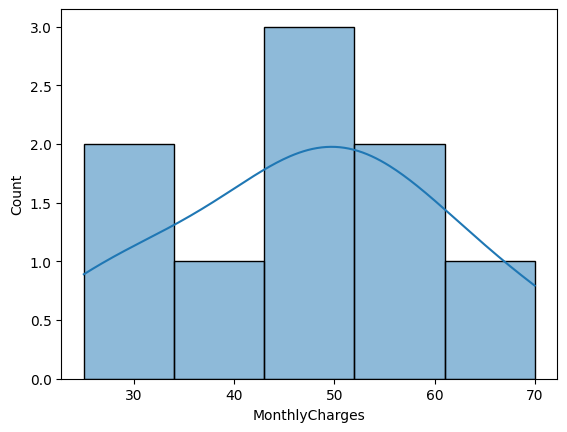

In [ ]:
sns.histplot(data=df, x='MonthlyCharges', bins=5, kde=True)

# Visualizes the distribution of MonthlyCharges.
# bins=5 - divide into 5 parts
# kde - Kernel Density Estimate - shows the overall shape of the distribution, making it easier to see peaks, spread, and patterns.

##### 7. Convert Churn to numeric

In [21]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)
print(df[['customer_id','Churn']])

# Converts Churn column to 1/0 for analysis.

   customer_id  Churn
0            1      1
1            2      0
2            3      0
3            4      1
4            5      0
6            7      0
7            8      0
8            9      1
9           10      0


##### 8. Check if customer_id is unique

In [12]:
print(df['customer_id'].is_unique)

# Returns True if all customer_ids are unique, False otherwise.

True


##### 9. Drop duplicate rows

In [14]:
df.drop_duplicates(inplace=True)
print(df)
# Removes duplicate rows if any exist.

   customer_id   Age         City Product  Sales  MonthlyCharges  Churn
0            1  34.0     New York   Bread    120              50      1
1            2  45.0  Los Angeles    Milk     80              40      0
2            3  23.0      Chicago  Butter     50              30      0
3            4  67.0      Houston   Bread    200              60      1
4            5  54.0      Phoenix    Milk     90              45      0
6            7  70.0     New York   Bread    150              55      0
7            8  29.0  Los Angeles    Milk     60              25      0
8            9  65.0      Houston  Butter    180              70      1
9           10  40.0      Phoenix   Bread    110              50      0


##### 10. Pivot table: sum of sales per city and product

In [15]:
pivot_table = df.pivot_table(index='City', columns='Product', values='Sales', aggfunc='sum')
print(pivot_table)

# Shows total sales per product in each city.

Product      Bread  Butter   Milk
City                             
Chicago        NaN    50.0    NaN
Houston      200.0   180.0    NaN
Los Angeles    NaN     NaN  140.0
New York     270.0     NaN    NaN
Phoenix      110.0     NaN   90.0


##### 11. Create is_senior column

In [16]:
df['is_senior'] = df['Age'] >= 65
print(df[['customer_id','Age','is_senior']])

# Flags customers 65 or older.

   customer_id   Age  is_senior
0            1  34.0      False
1            2  45.0      False
2            3  23.0      False
3            4  67.0       True
4            5  54.0      False
6            7  70.0       True
7            8  29.0      False
8            9  65.0       True
9           10  40.0      False


##### 12. Chi-Square test example

In [ ]:
# Example: Check if Churn depends on is_senior
contingency_table = pd.crosstab(df['is_senior'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 = {chi2}, p-value = {p}")

# Tests if being senior is associated with Churn.
# Significance level
alpha = 0.05

print(f"\nChi2 statistic = {chi2:.3f}, p-value = {p:.3f}")

# Conclusion
if p < alpha:
    print(f"p-value < {alpha}: Reject null hypothesis → Being senior is associated with churn.")
else:
    print(f"p-value >= {alpha}: Fail to reject null hypothesis → No significant association between being senior and churn.")

# Being solder does not appear to influence whether a customer churns.

Chi2 = 0.5625, p-value = 0.4532547047537363

Chi2 statistic = 0.562, p-value = 0.453
p-value >= 0.05: Fail to reject null hypothesis → No significant association between being senior and churn.


##### 13. Independent t-test example

In [19]:
# Compare MonthlyCharges for churned vs non-churned customers
group1_charges = df[df['Churn']==1]['MonthlyCharges']
group2_charges = df[df['Churn']==0]['MonthlyCharges']
t_stat, p_val = stats.ttest_ind(group1_charges, group2_charges)
print(f"T-statistic = {t_stat}, p-value = {p_val}")

# Set significance level
alpha = 0.05

print(f"T-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")

# Conclusion based on p-value
if p_val < alpha:
    print(f"p-value < {alpha}: Reject the null hypothesis → MonthlyCharges are significantly different between churned and non-churned customers.")
else:
    print(f"p-value >= {alpha}: Fail to reject the null hypothesis → No significant difference in MonthlyCharges between churned and non-churned customers.")

# Tests if average MonthlyCharges differ between churned and non-churned customers.

T-statistic = 2.4302059823042637, p-value = 0.04540681580332904
T-statistic = 2.430, p-value = 0.045
p-value < 0.05: Reject the null hypothesis → MonthlyCharges are significantly different between churned and non-churned customers.
